# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [ ]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [ ]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [ ]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Data Size
df.shape

(48842, 15)

In [ ]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

NAMA : MARSYA AURELIA SEFIRA
NIM : 2341720011
ABSEN : 15

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [ ]:
# Jawab Soal 1
# Inspeksi profile data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
# Variabel yang missing value, dan jumlahnya
df.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [ ]:
# Jawab Soal 2
kolom_hilang = df.columns[df.isnull().any()].tolist()

# imputasi untuk kolom yang nilainya hilang
for col in kolom_hilang:
    if df[col].dtype == 'object':
        df[col].fillna(value=df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(value=df[col].mean(), inplace=True)

# Cek apa masih ada data yang hilang
df.isnull().sum()

/tmp/ipython-input-929732926.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(value=df[col].mode()[0], inplace=True)


,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [ ]:
# Jawab Soal 3
# inspeksi fitur kualitatif
kolom_kualitatif = df.select_dtypes(include='object').columns

# unique value setiap kolom kualitatif
for col in kolom_kualitatif:
    print(f"\nColumn: {col}")
    print(df[col].unique())

# Ganti value yang salah menjadi 'Others'
for col in ['workclass', 'occupation', 'native-country']:
    df[col] = df[col].replace('?', 'Others')

# Membersihkan kolom income
df['income'] = df['income'].str.replace('.', '', regex=False)

# Hasil setelah penyesuaian
for col in kolom_kualitatif:
    print(f"Hasil setelah penyesuaian")
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Column: education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Column: marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Column: occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

Column: relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

Column: race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

Column: sex
['Male' 'Female']

Column: native-country
['United-States' 'Cuba' 'Jamaica' 'I

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

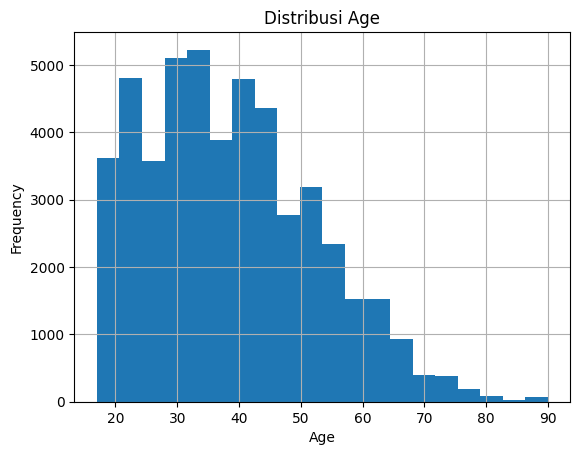

In [ ]:
# Jawab 1.1 - Histrogram
df['age'].hist(bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribusi Age")
plt.show()

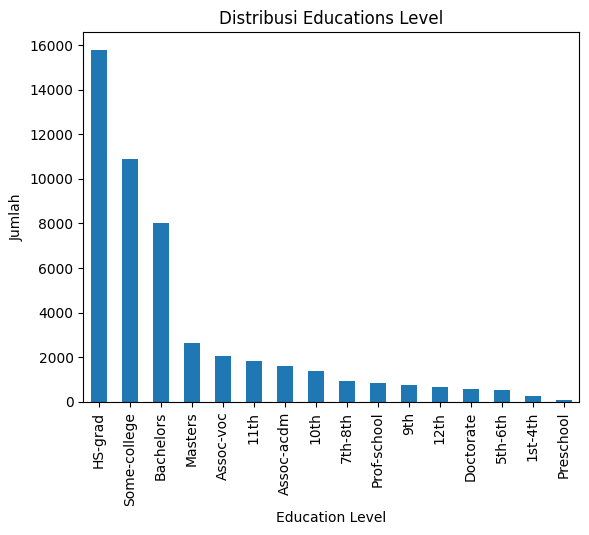

In [ ]:
# Jawab 1.2 - Barchart
df['education'].value_counts().plot(kind='bar')
plt.xlabel("Education Level")
plt.ylabel("Jumlah")
plt.title("Distribusi Educations Level")
plt.show()

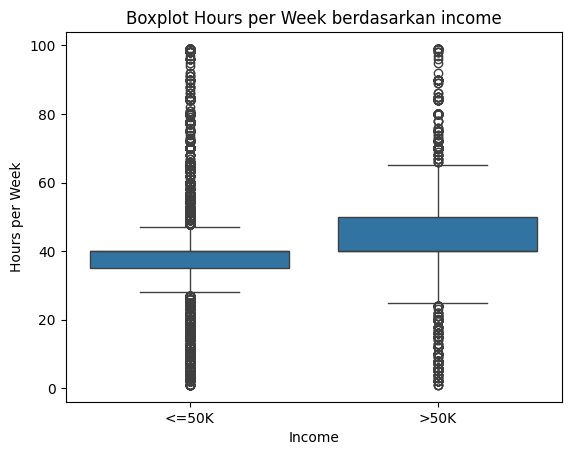

In [ ]:
# Jawab 1.3 - Boxplot
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title("Boxplot Hours per Week berdasarkan income")
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()

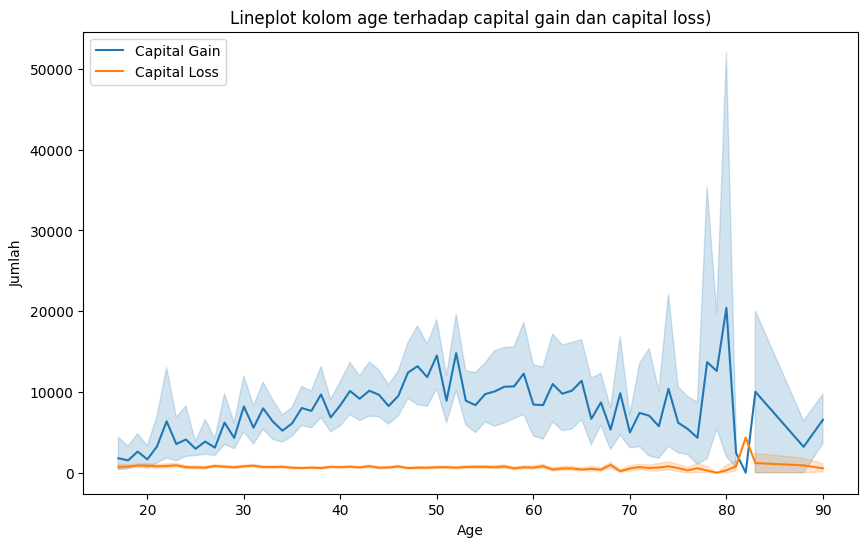

In [ ]:
# Jawab 1.4 - Lineplot
# filter baris dimana capital gain dan capital loss bernilai 0
df_filtered = df[(df['capital-gain'] > 0) | (df['capital-loss'] > 0)]

plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='capital-gain', data=df_filtered, label='Capital Gain')
sns.lineplot(x='age', y='capital-loss', data=df_filtered, label='Capital Loss')
plt.title('Lineplot kolom age terhadap capital gain dan capital loss)')
plt.xlabel('Age')
plt.ylabel('Jumlah')
plt.legend()
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [ ]:
# Jawab dengan komentar python

'''
1. Fenomena yang terjadi pada distribusi data age adalah distribusi tidak simetris, karena condong ke kanan
mayoritas data berada pada usia produktif sekitar 25-45 tahun, setelah usia 50 frekuensi mulai turun
artinya lebih sedikit orang yang usianya lebih dari 50 tahun, ada beberapa data usia diatas 70 bahkan 80

2. Jika terdapat data yang hilang, melakukan strategi dengan mean, distribusi tidak akan berubah terlalu banyak

3. Kategori dengan outlier terbanyak adalah <=50k yang berarti banyak pekerja dengan penghasilan <=50k
'''

'\n1. Fenomena yang terjadi pada distribusi data age adalah distribusi tidak simetris, karena condong ke kanan\nmayoritas data berada pada usia produktif sekitar 25-45 tahun, setelah usia 50 frekuensi mulai turun\nartinya lebih sedikit orang yang usianya lebih dari 50 tahun, ada beberapa data usia diatas 70 bahkan 80\n\n2. Jika terdapat data yang hilang, melakukan strategi dengan mean, distribusi tidak akan berubah terlalu banyak\n\n3. Kategori dengan outlier terbanyak adalah <=50k yang berarti banyak pekerja dengan penghasilan <=50k\n'

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [ ]:
# Jawab Soal 1
df['sex_encoded'] = df['sex'].map({'Male': 1, 'Female': 0})

df['income_encoded'] = df['income'].map({'>50K': 1, '<=50K': 0})

# Menampilkan hasil
print(df[['sex', 'sex_encoded', 'income', 'income_encoded']].head())

      sex  sex_encoded income  income_encoded
0    Male            1  <=50K               0
1    Male            1  <=50K               0
2    Male            1  <=50K               0
3    Male            1  <=50K               0
4  Female            0  <=50K               0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

Tabel hasil korelasi:
                     age  education-num  hours-per-week  capital-gain  \
age             1.000000       0.030940        0.071558      0.077229   
education-num   0.030940       1.000000        0.143689      0.125146   
hours-per-week  0.071558       0.143689        1.000000      0.082157   
capital-gain    0.077229       0.125146        0.082157      1.000000   
capital-loss    0.056944       0.080972        0.054467     -0.031441   
income_encoded  0.230369       0.332613        0.227687      0.223013   

                capital-loss  income_encoded  
age                 0.056944        0.230369  
education-num       0.080972        0.332613  
hours-per-week      0.054467        0.227687  
capital-gain       -0.031441        0.223013  
capital-loss        1.000000        0.147554  
income_encoded      0.147554        1.000000  


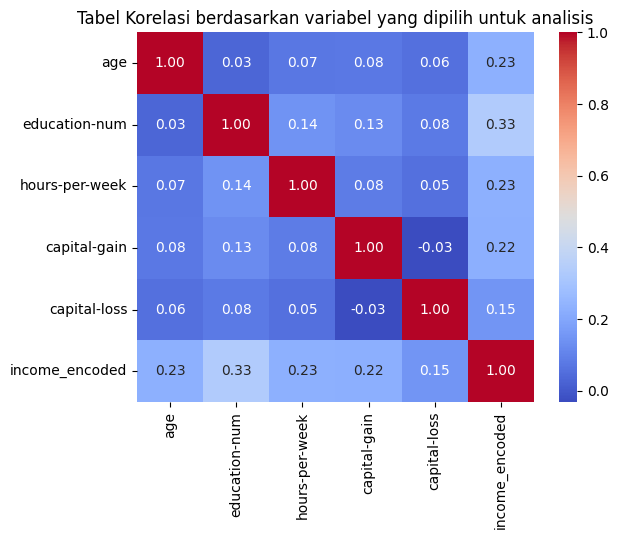

In [ ]:
# Jawab Soal 1
# Variabel untuk analisis korelasi
var_korelasi = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income_encoded']

# menghitung untuk tabel korelasi
tabel_korelasi = df[var_korelasi].corr()

# menampilkan hasil
print("Tabel hasil korelasi:")
print(tabel_korelasi)

# Visualisasi dengan heatmap
sns.heatmap(tabel_korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Tabel Korelasi berdasarkan variabel yang dipilih untuk analisis')
plt.show()

In [ ]:
# Hasil analisis jelaskan pada cell ini
'''
Education-num adalah variabel yang paling berpengaruh terhadap pendapatan, age dan hours per week juga
berkontribusi penting , fitur lain tetap dipertahankan walaupun berkorelasi rendah.
'''

'\nEducation-num adalah variabel yang paling berpengaruh terhadap pendapatan, age dan hours per week juga \nberkontribusi penting , fitur lain tetap dipertahankan walaupun berkorelasi rendah.\n'

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [ ]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


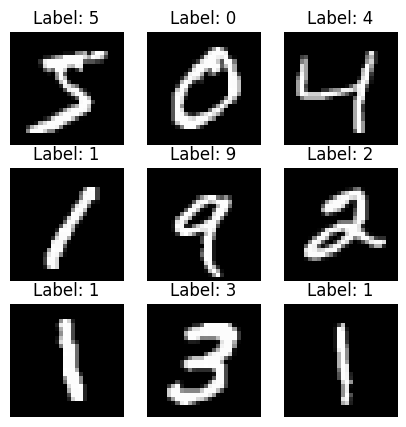

In [ ]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

In [ ]:
# Jawab Soal 1
from skimage.transform import resize

Shape setelah unsampling: (10000, 32, 32)


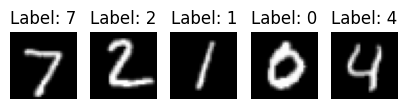

In [ ]:
#upsampling
X_test_upsampled = np.array([resize(img, (32, 32)) for img in X_test])

# shape setelah unsampling
print("Shape setelah unsampling:", X_test_upsampled.shape)

# Tampilakan 5 data hasil proses upsampling
plt.figure(figsize=(5,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test_upsampled[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

In [ ]:
# Jawab Soal 2
# normalisasi pixel
X_test_normalized = X_test_upsampled / 255.0

# Rentang nilai pixel setelah normalisasi
print("Minimal pixel setelah normalisasi:", X_test_normalized.min())
print("Maksimal pixel setelah normalisasi:", X_test_normalized.max())

Minimal pixel setelah normalisasi: 0.0
Maksimal pixel setelah normalisasi: 0.00392156862745098


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [ ]:
# Jawab Soal 3
X_test_flattened = X_test_normalized.reshape(X_test_normalized.shape[0], -1)

# Menampilkan hasil shape dan data pertama dari image yang sudah di flatten
print("Shape dari data yang sudah di flatten:", X_test_flattened.shape)
print("\nData pertama:")
print(X_test_flattened[0])

Shape dari data yang sudah di flatten: (10000, 1024)

Data pertama:
[0. 0. 0. ... 0. 0. 0.]
